In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
path=r'/Users/michellejuliet/Downloads/housing.csv'

<h3> Loading the data </h3>

In [4]:
df=pd.read_csv(path)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


<h3> Data Preprocessing </h3>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# This drops all the null rows and saves the new dataset without null values
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


<h3> Feature Engineering. </h3>

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [11]:
x=df.drop(['median_house_value'], axis=1)
y=df['median_house_value']

In [17]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

<h3> Data Exploration </h3>

In [18]:
train_data=X_train.join(y_train)

In [19]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
489,-122.25,37.86,48.0,2153.0,517.0,1656.0,459.0,3.0417,NEAR BAY,489600.0
2117,-119.73,36.76,30.0,1548.0,282.0,886.0,311.0,3.1000,INLAND,71300.0
18861,-122.19,38.13,5.0,7854.0,1446.0,4361.0,1395.0,4.9504,NEAR BAY,214800.0
6855,-118.15,34.06,28.0,3855.0,922.0,2517.0,874.0,3.5050,<1H OCEAN,204300.0
5321,-118.43,34.05,52.0,1693.0,290.0,727.0,305.0,6.7115,<1H OCEAN,500001.0
...,...,...,...,...,...,...,...,...,...,...
11065,-117.88,33.79,32.0,1484.0,295.0,928.0,295.0,5.1418,<1H OCEAN,190300.0
17455,-120.43,34.70,26.0,2353.0,389.0,1420.0,389.0,3.8700,NEAR OCEAN,125800.0
5249,-118.45,34.08,52.0,1500.0,176.0,384.0,145.0,7.1576,<1H OCEAN,500001.0
12290,-116.97,33.94,29.0,3197.0,632.0,1722.0,603.0,3.0432,INLAND,91200.0


array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

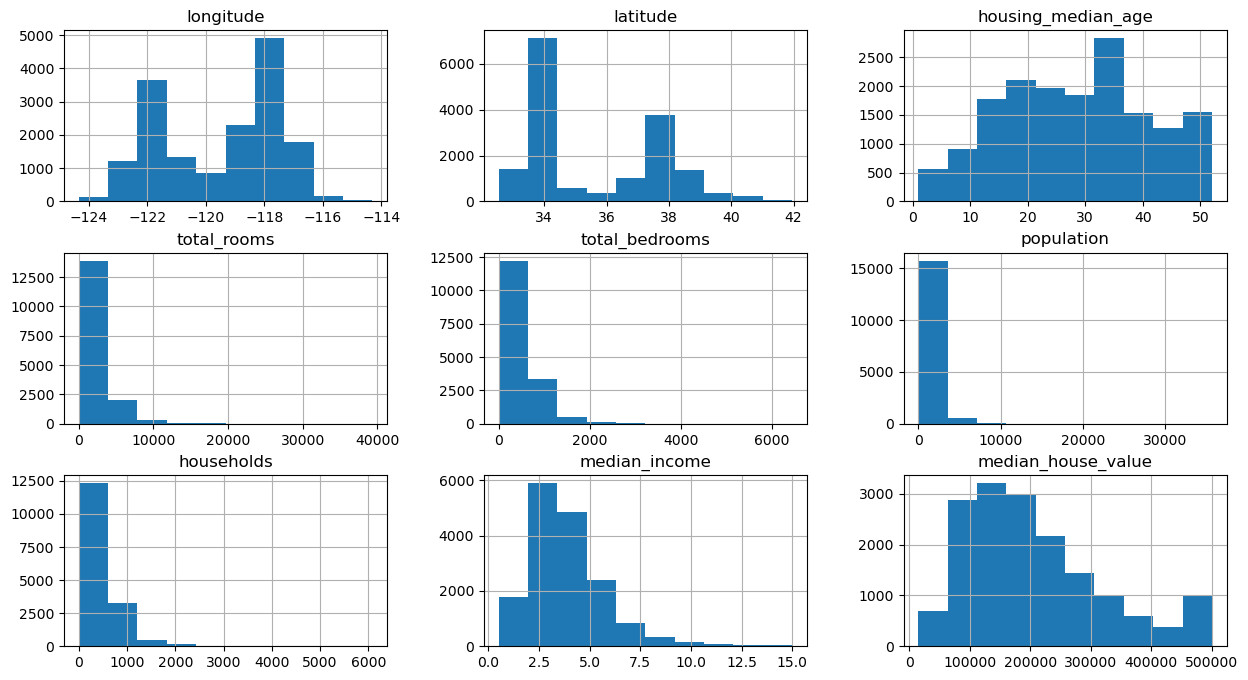

In [21]:
train_data.hist(figsize=(15,8))

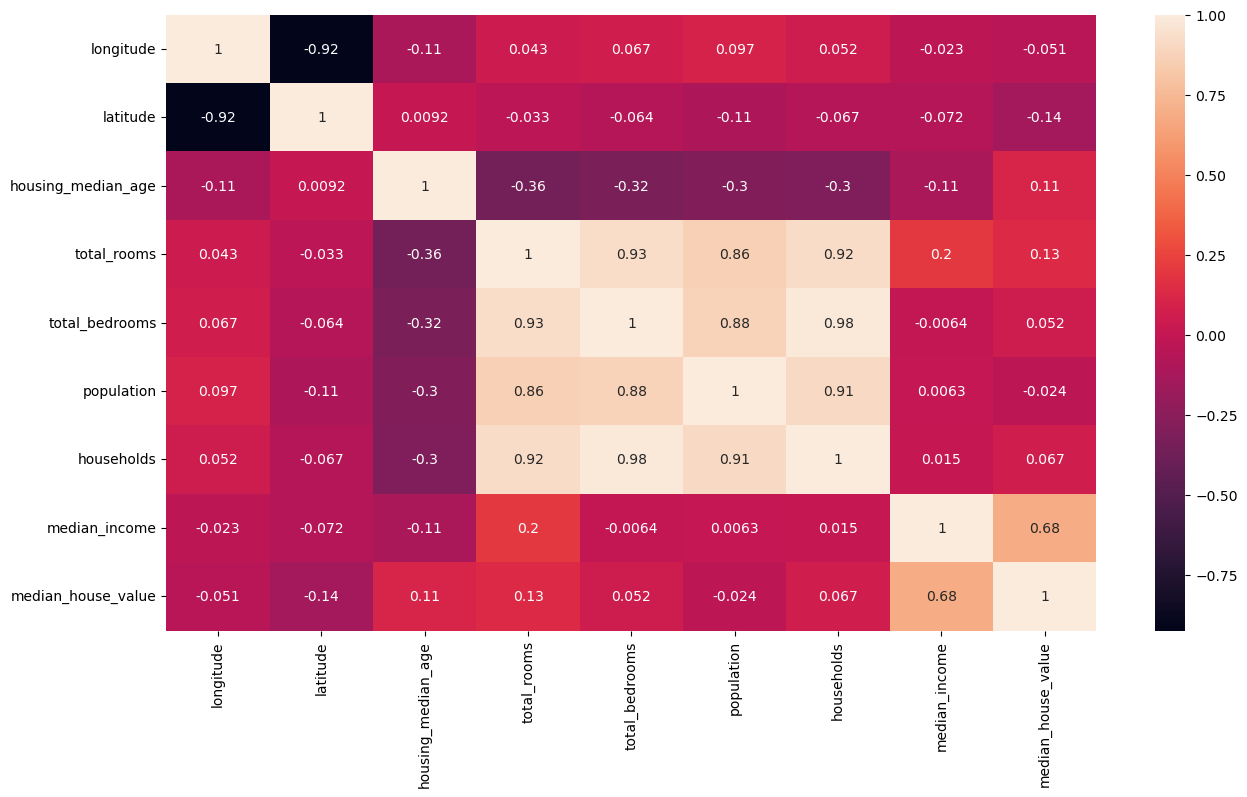

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True)
plt.show()

According to this heatmap, we can see that median_income correlates possitively to median_house_value at 68 percent. And we can actually use that for predictions.

<h3> Prediction Data Preprocessing. </h3>

According to the histograms earlier, we can see that most diagrams are not skewed normaly, either skewed to the left or right and we need to work with data that is normally skewed, for this we will have to normalize the dataset using the log function.

In [25]:
df.columns
# I do this in order to write the column names well

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [26]:
# To prevent zero values, we are going to go in with a plus one
train_data['total_rooms']= np.log(train_data['total_rooms'] + 1) 
train_data['total_bedrooms']= np.log(train_data['total_bedrooms'] + 1) 
train_data['population']= np.log(train_data['population'] + 1) 
train_data['households']= np.log(train_data['households'] + 1) 

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

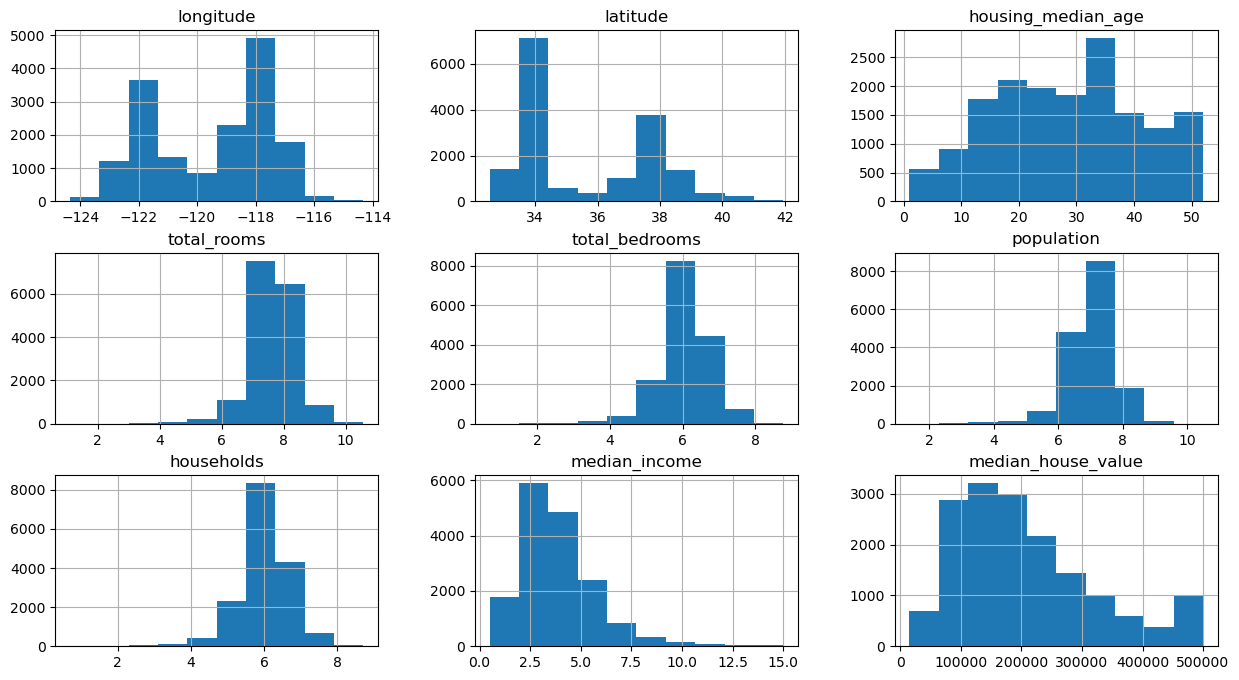

In [28]:
train_data.hist(figsize=(15,8))

As you can see, the diagrams are now normally skewed. It seems to give a normal distribution on the total_rooms, total_bedrooms, population and households histograms.

<h4> Encoding </h4>

As we check the column named ocean_proximity, it is a categorical variable meaning that it is an object and we need numerical variables for prediction. The column really helps so much in our prediction, hence we cannot drop the column. We assume that: The houses close to the ocean are higher in prices compared to the inland houses that are not close to the ocean. So let us fix that:

In [29]:
train_data.ocean_proximity.value_counts()

<1H OCEAN     7232
INLAND        5188
NEAR OCEAN    2093
NEAR BAY      1830
ISLAND           3
Name: ocean_proximity, dtype: int64

In [31]:
pd.get_dummies(train_data.ocean_proximity)
# In this function, we have created a binary encoding system where 1 represents yes and 0 represents no

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
489,0,0,0,1,0
2117,0,1,0,0,0
18861,0,0,0,1,0
6855,1,0,0,0,0
5321,1,0,0,0,0
...,...,...,...,...,...
11065,1,0,0,0,0
17455,0,0,0,0,1
5249,1,0,0,0,0
12290,0,1,0,0,0


In [33]:
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

In [34]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
489,-122.25,37.86,48.0,7.675082,6.249975,7.412764,6.131226,3.0417,489600.0,0,0,0,1,0
2117,-119.73,36.76,30.0,7.345365,5.645447,6.787845,5.743003,3.1000,71300.0,0,1,0,0,0
18861,-122.19,38.13,5.0,8.968906,7.277248,8.380686,7.241366,4.9504,214800.0,0,0,0,1,0
6855,-118.15,34.06,28.0,8.257386,6.827629,7.831220,6.774224,3.5050,204300.0,1,0,0,0,0
5321,-118.43,34.05,52.0,7.434848,5.673323,6.590301,5.723585,6.7115,500001.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11065,-117.88,33.79,32.0,7.303170,5.690359,6.834109,5.690359,5.1418,190300.0,1,0,0,0,0
17455,-120.43,34.70,26.0,7.763871,5.966147,7.259116,5.966147,3.8700,125800.0,0,0,0,0,1
5249,-118.45,34.08,52.0,7.313887,5.176150,5.953243,4.983607,7.1576,500001.0,1,0,0,0,0
12290,-116.97,33.94,29.0,8.070281,6.450470,7.451822,6.403574,3.0432,91200.0,0,1,0,0,0


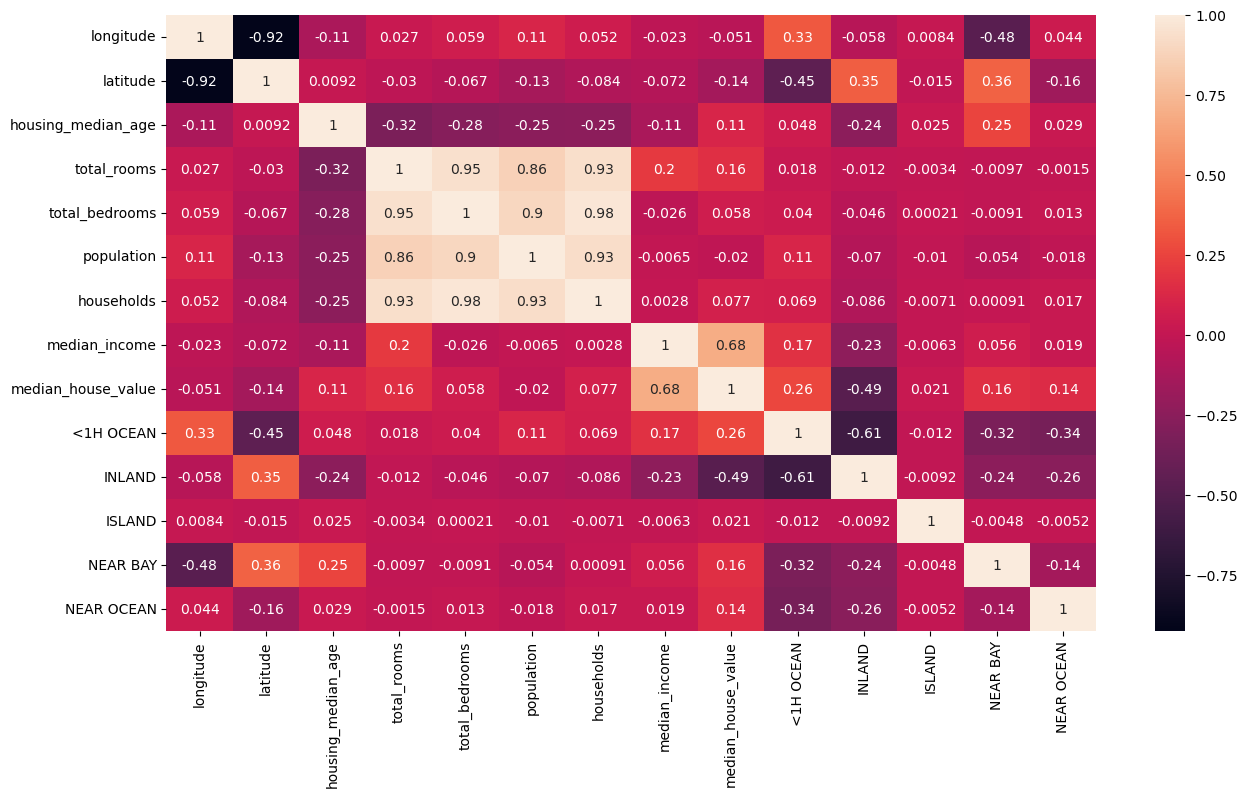

In [35]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True)
plt.show()

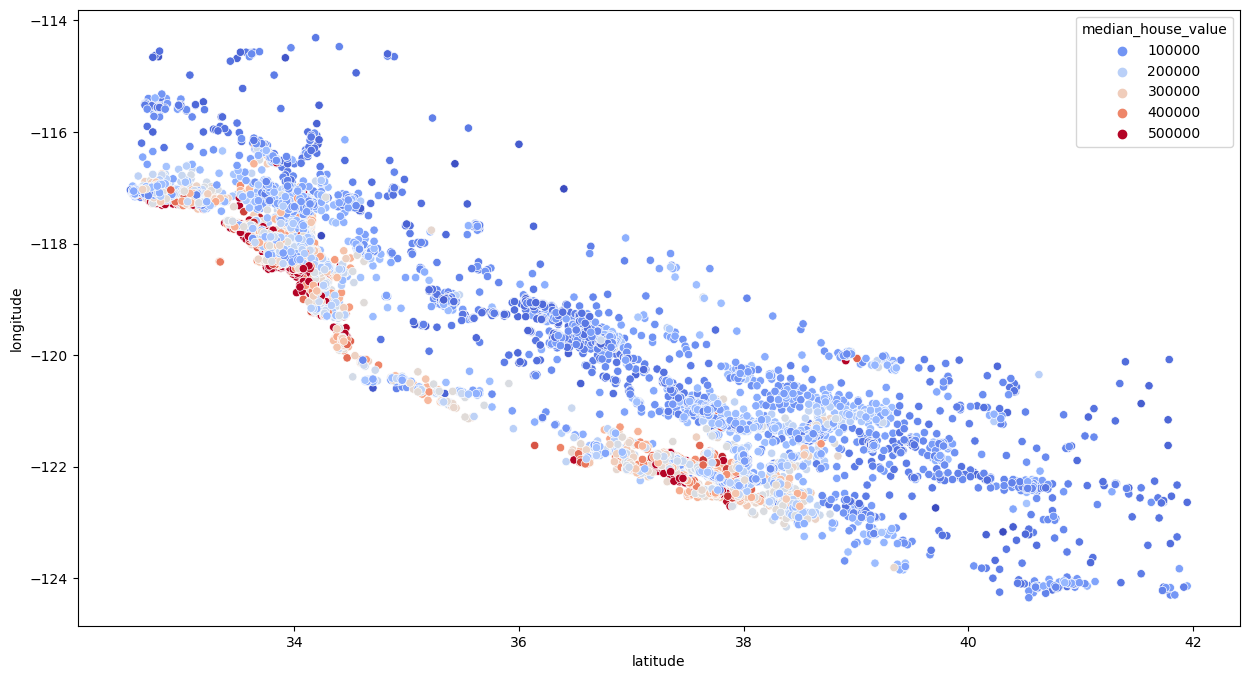

In [36]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')
plt.show()

According to the scatterplot, the more red it gets the more expensive it is and the more blue it gets, the less expensive it is. And as you check closely, the red represents the houses near the coast that's why it is expensive and the blue region is far from the coastal region.

<h3> Feature Engineering. </h3>

In [37]:
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

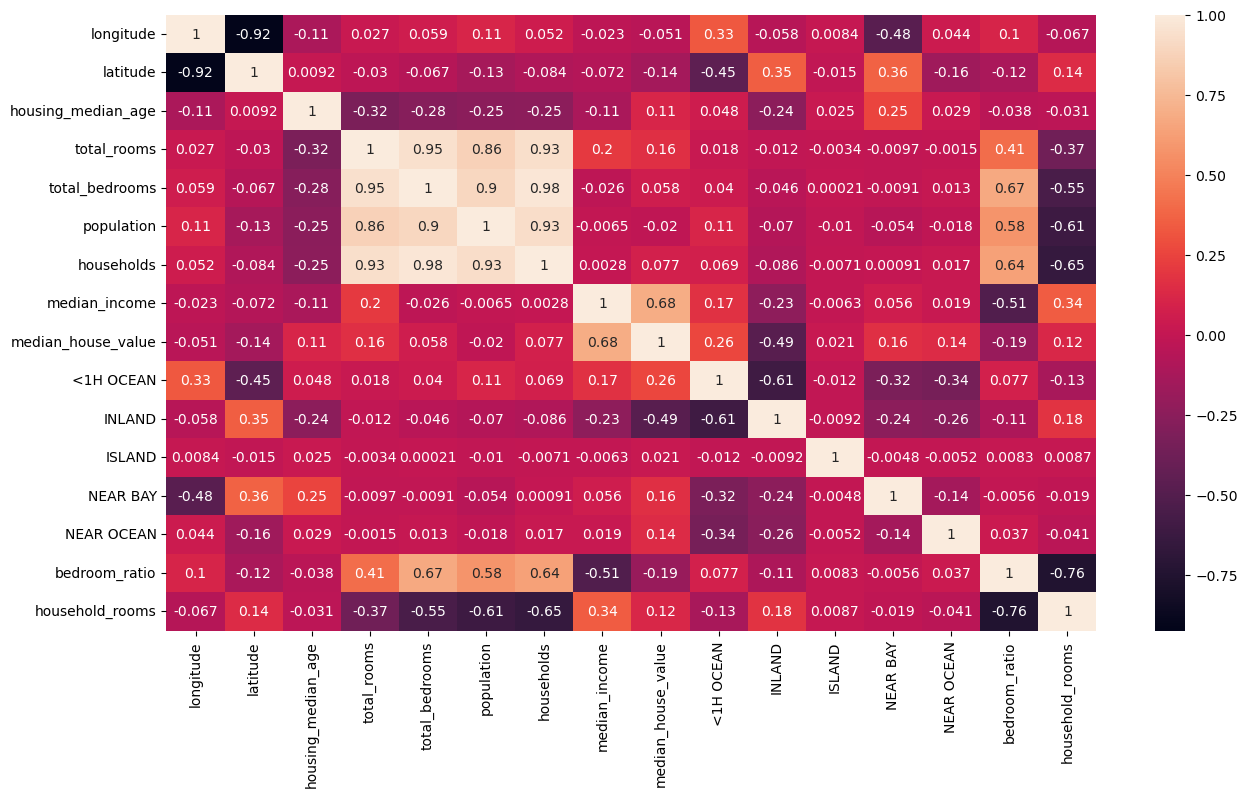

In [38]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(), annot=True)
plt.show()

According to this heatmap, the bedroom ratio has a negative correlation with the median_house_value.
And, the household variable has a correlation of 0.077 compared to the household_rooms which have 0.12 to our target variable.

<h3> LINEAR MODEL </h3>

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
X_train, y_train=train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']

reg=LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [42]:
test_data=X_test.join(y_test)

test_data['total_rooms']= np.log(test_data['total_rooms'] + 1) 
test_data['total_bedrooms']= np.log(test_data['total_bedrooms'] + 1) 
test_data['population']= np.log(test_data['population'] + 1) 
test_data['households']= np.log(test_data['households'] + 1) 

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

In [44]:
X_test, y_test=test_data.drop(['median_house_value'], axis=1), test_data['median_house_value']

In [51]:
#reg.score(X_test, y_test). Hoping it is sth above 50%

<h3> Scaling the data </h3>

In [53]:
from sklearn.preprocessing import StandardScaler

In [55]:
scaler=StandardScaler()

X_train, y_train=train_data.drop(['median_house_value'], axis=1), train_data['median_house_value']
X_train_s= scaler.fit_transform(X_train)

reg=LinearRegression()

reg.fit(X_train_s, y_train)

LinearRegression()

In [58]:
#X_test_s = scaler.transform(X_test)

<h3> Random Forest Regression </h3>

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [67]:
# forest.score(X_test, y_test) Maybe 80%

<h3> Cross Validation </h3>

In [68]:
from sklearn.model_selection import GridSearchCV

In [71]:
forest=RandomForestRegressot()

parameter_grid=(
    "n_estimators": [3,10,30]
    "max_features":[2,4,6,8]
)

grid_search = GridSearchCV(forest, parameter_grid, cv=5,
                          scoring="neg_mean_squared_error",
                          return_train_score=True)

grid_search.fit(X_train_s, y_train)

SyntaxError: invalid syntax (519847236.py, line 4)

In [ ]:
grid_search.best_estimator_

In [ ]:
best_forest=grid_search.best_estimator_

In [ ]:
best_forest.score(X_test_s, y_test)